<a href="https://colab.research.google.com/github/praveenbejo95/Cardiovascular-risk-prediction-ML-classification-project/blob/main/Team_colab_notebook_(CHD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ML(Classification Project) Cardiovascular Risk Prediction  by kirtesh Verma, Pravin Bejjo, and Sahil Pardeshi**

## **Objective:**

### **To predict Heart Diseases from the given Dataset**

## **Steps Involved:**

* Importing the Libraries

* Loading the dataset

* Overview of the data

* Data Preprocessing

* Data Cleaning & Treat Outliers

* EDA

* Handling Imbalanced Data

* Data Standardization

* Data Modelling & Training

* Evaluation of Models

* Conclusion

# **Team members Contribution**

## **By kirtesh verma**

### Contribution:

1. Data understanding
2. Handling null or missing values
3. Performing EDA
4. Removing Outliers
5. Logistic Regression
6. Support Vector Machine
7. Hyperparameter Tuning on SVM

## **By Pravin Bejjo**

## Contribution:

1. Data understanding
2. Data visualization
3. Multivariate analysis
4. Handle Imbalanced Data using SMOTE Technique
5. Random Forest
6. XGBoost Classifier
7. XGBoost(Feature Importance)

## **By Sahil Pardeshi**

## Contribution:

1. Data understanding
2. Data visualization
3. Bivariate analysis
4. Decision Tree Classifier
5. K-Nearest Neighbour Classifier
6. Hyperparameter Tuning on KNN

In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Capstone_Project_03/data_cardiovascular_risk.csv'

In [ ]:
# Loading the csv File

df = pd.read_csv(path)
df.head() # head of the data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape #Looking at the shape of the dataset

(3390, 17)

In [ ]:
df.info()  #checks the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## **Preprocessing the dataset**

**Why do we need to handle missing values?**

* **The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.**

In [ ]:
#Let's count how many missing values we have

df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**It shows the number of np.nan or null values or missing values are present in the dataset**

## **Duplicate values**

**Why is it important to remove duplicate records from my data?**

* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**

In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**It shows that there are no Duplicated Values present in the dataset.**

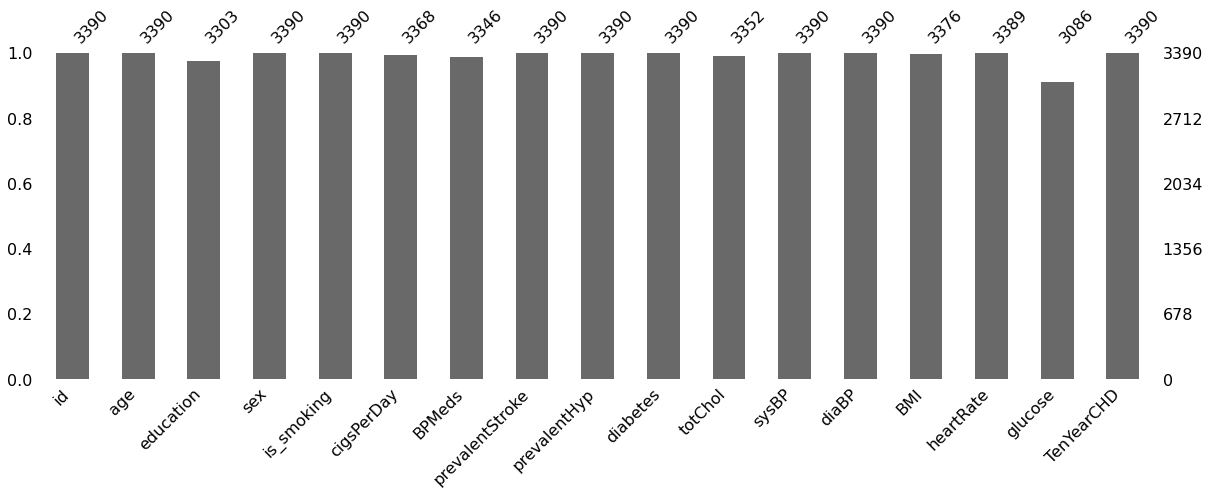

In [ ]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.bar(df,figsize = (20,6))

In [ ]:
# Let us check the majority and minority set of the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

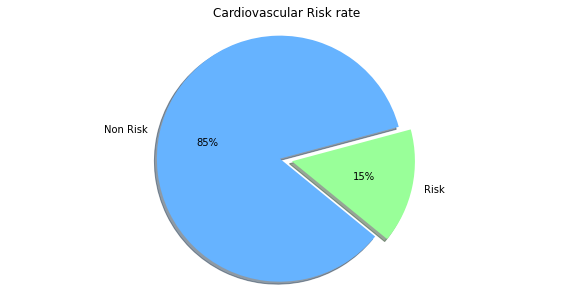

In [ ]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['#66b3ff','#99ff99']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

**85% people - No Risk - Majority Class**

**15% people - Risk - Minority Class**

## **Data Cleaning**

### **Handling NaN values**

In [ ]:
# Let us drop the ID column as it is unique and not of much use for this analysis.
df.drop('id',axis=1,inplace=True)

In [ ]:
# Let us check the new shape
df.shape

(3390, 16)

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Total NaN values
(df.isnull().sum()).sum()

510

In [ ]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Let us check if any of the NaN values belong to the minority class
print(f'Education:total NaN value is = {df.education.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.education.isnull())].shape}')
print(f'cigsPerDay:total NaN value is = {df.cigsPerDay.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.cigsPerDay.isnull())].shape}')
print(f'BPMeds:total NaN value is = {df.BPMeds.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.BPMeds.isnull())].shape}')
print(f'totChol:total NaN value is = {df.totChol.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.totChol.isnull())].shape}')
print(f'BMI:total NaN value is = {df.BMI.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.BMI.isnull())].shape}')
print(f'heartRate:total NaN value is = {df.heartRate.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.heartRate.isnull())].shape}')
print(f'glucose:total NaN value is = {df.glucose.isnull().sum()}, MinorityNaN count = {df[(df["TenYearCHD"]==1) & (df.glucose.isnull())].shape}')


Education:total NaN value is = 87, MinorityNaN count = (13, 16)
cigsPerDay:total NaN value is = 22, MinorityNaN count = (1, 16)
BPMeds:total NaN value is = 44, MinorityNaN count = (7, 16)
totChol:total NaN value is = 38, MinorityNaN count = (7, 16)
BMI:total NaN value is = 14, MinorityNaN count = (7, 16)
heartRate:total NaN value is = 1, MinorityNaN count = (1, 16)
glucose:total NaN value is = 304, MinorityNaN count = (39, 16)


Simplest way to infer the above data is as below#


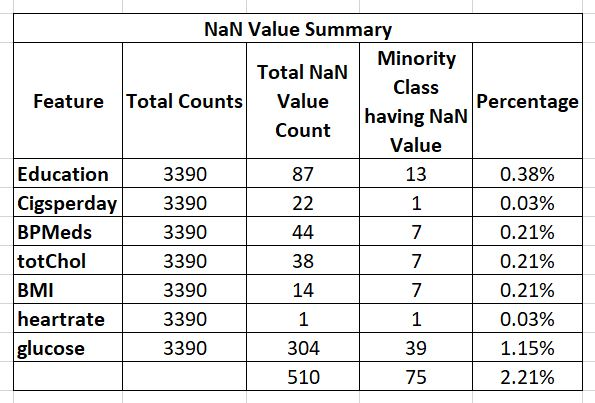

**Dropping the NaN values will lead to 2.21% loss of the minority set, which is already at 15%. Let us impute values to these, so that we don't loose the minority class data.**

In [ ]:
# filling the null values with median and mode for numeric and categorical columns respectively
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace = True)
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## **Label Encoding**

In [ ]:
# One Hot Encoding 

df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
# creating a list that contains all the numerical features
numerical_columns  = [i for i in df.columns if len(df[i].unique())>25]
print(list(numerical_columns))

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# creating a list that contains all the categorical features
categorical_columns = [i for i in df.columns if len(df[i].unique())<10]

categorical_columns.remove('TenYearCHD') # dropping the target variable i.e. TenYearCHD
print(list(categorical_columns))

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


## **Overview of Outliers**

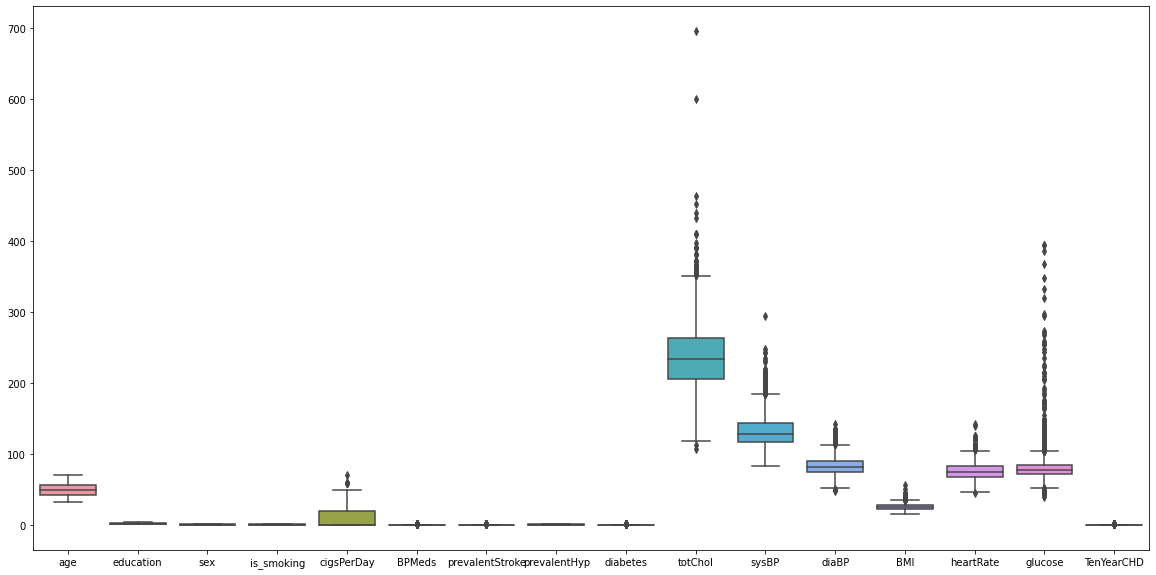

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

* **Outliers can be seen in both the categorical and numerical columns**
* **outliers are present in totChol, cigsPerDay, diaBP,sysBP,hearRate,glucose.**
* **Glucose feature has highest number of outliers.**
* **Outliers are important here and we simply cannot remove them because there could be a possibility that a person might have a high risk and removing it, would lead to ignorance of the same.**
* **This would further affect the machine learning model.**

## **Performing EDA on the dataset**

In [ ]:
# looking at the unique values of each column in categorical columns
for feature in categorical_columns:
    print(feature,':')
    print(df[feature].value_counts())
    print("----------------")

education :
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
----------------
sex :
0    1923
1    1467
Name: sex, dtype: int64
----------------
is_smoking :
0    1703
1    1687
Name: is_smoking, dtype: int64
----------------
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
----------------
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
----------------
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
----------------
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64
----------------


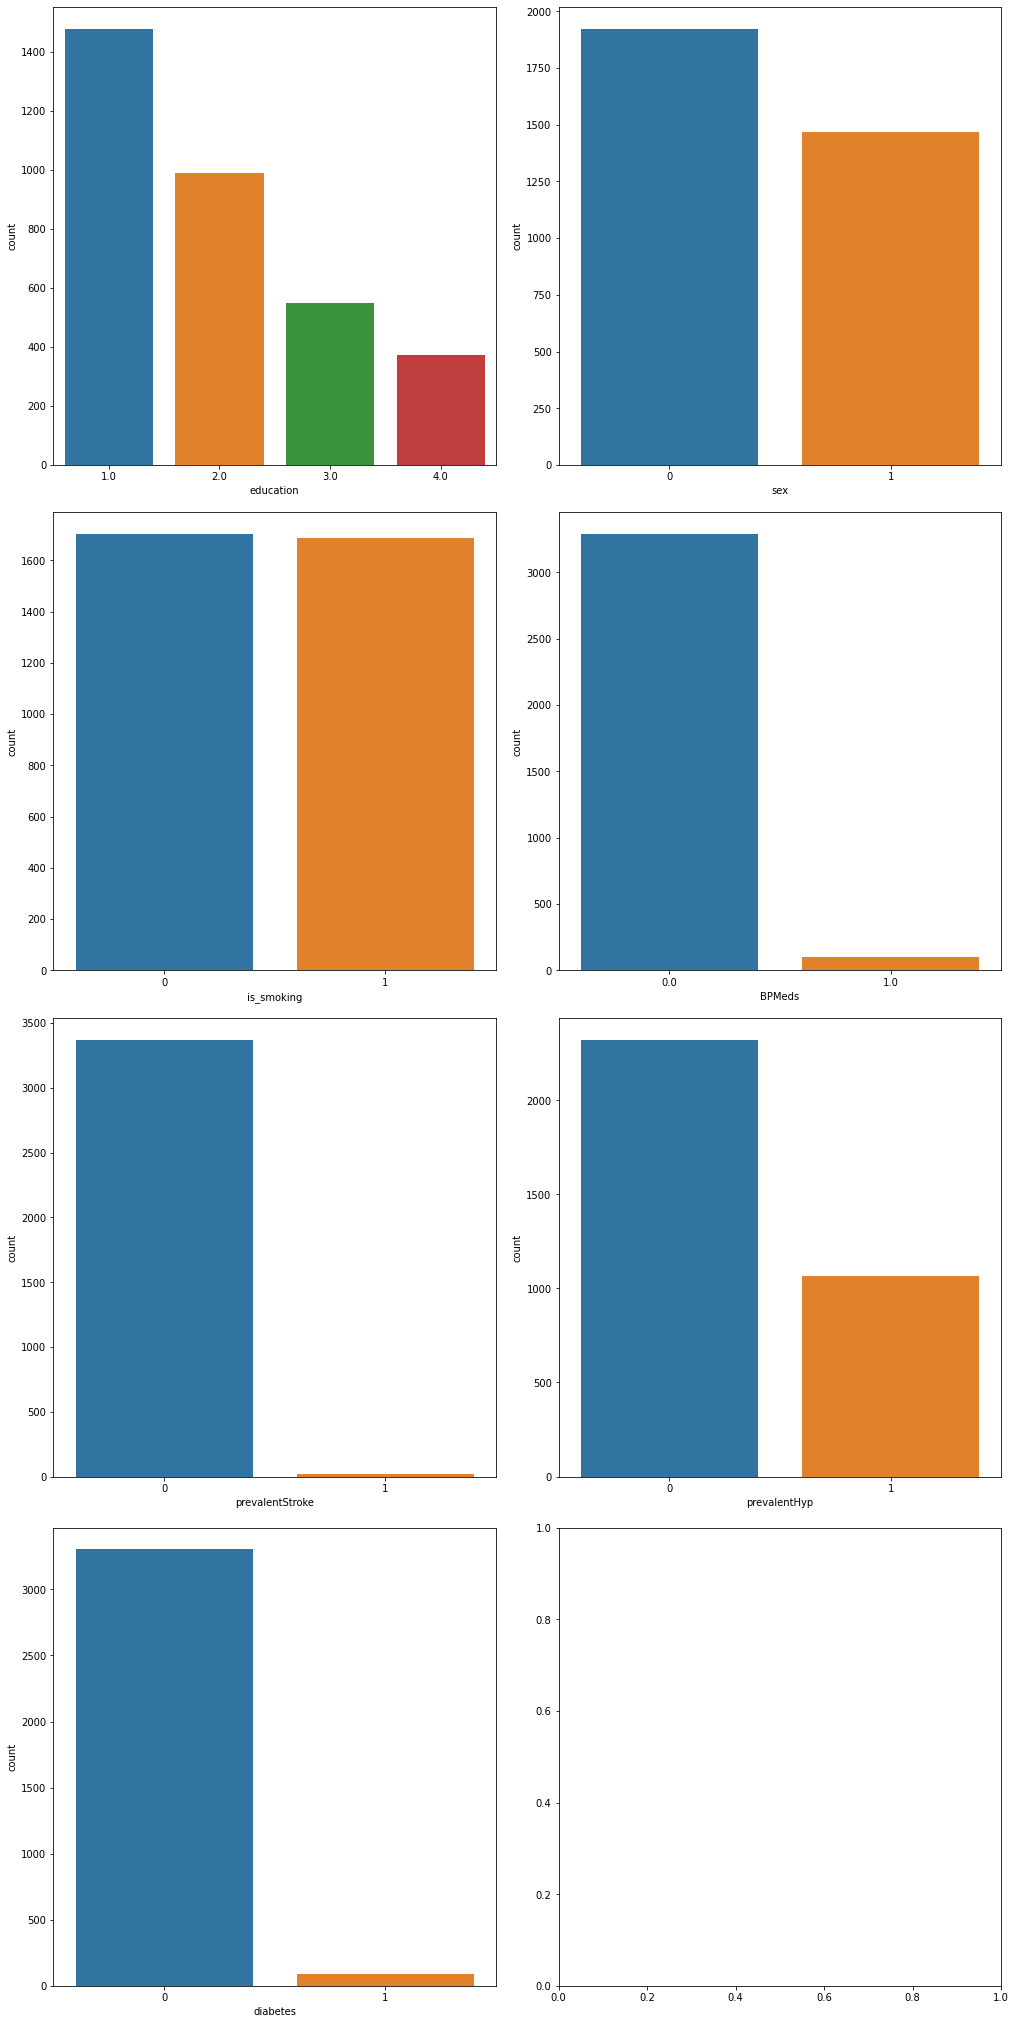

In [ ]:
#plotting countplot for categorical columns
num_plots = len(categorical_columns)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_columns):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

**Number of people who were not on BPmeds, who did not had a stroke in past, and who are dont have diastolic blood pressure are very less.**

## **EDA - Feature Analysis on Continuous Features**

<Figure size 720x432 with 0 Axes>

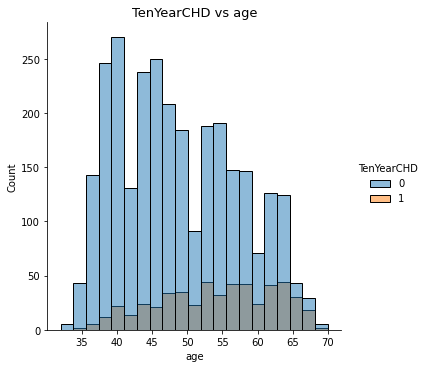

<Figure size 720x432 with 0 Axes>

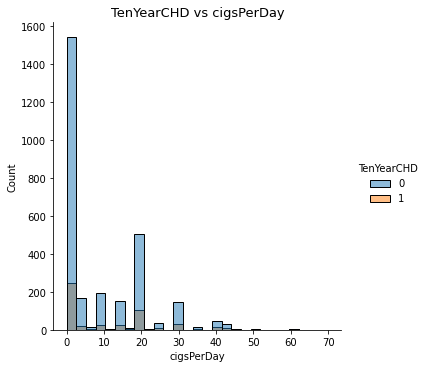

<Figure size 720x432 with 0 Axes>

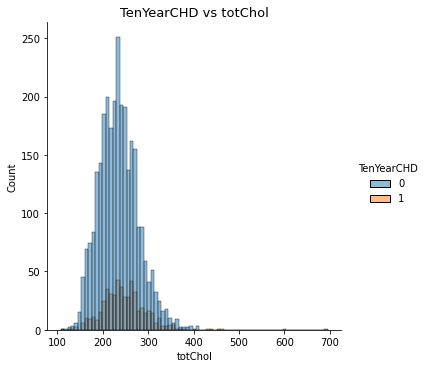

<Figure size 720x432 with 0 Axes>

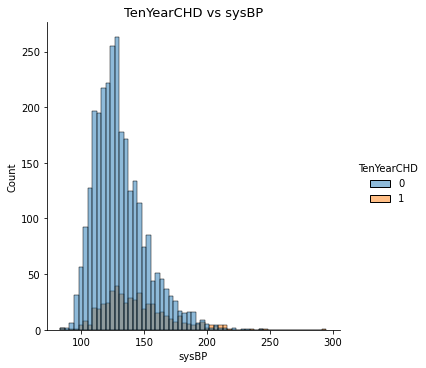

<Figure size 720x432 with 0 Axes>

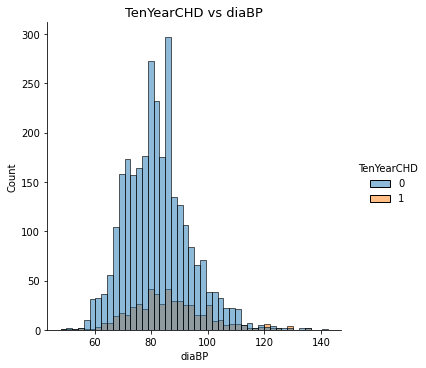

<Figure size 720x432 with 0 Axes>

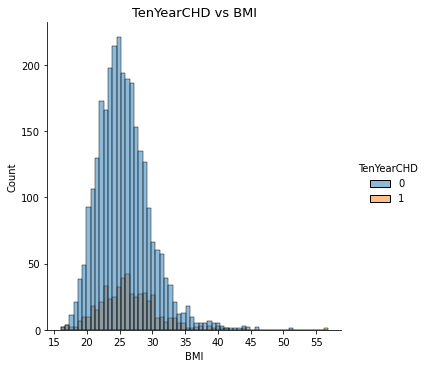

<Figure size 720x432 with 0 Axes>

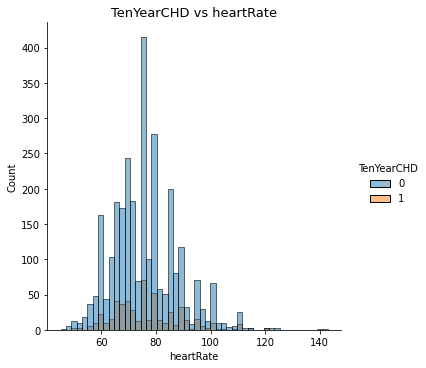

<Figure size 720x432 with 0 Axes>

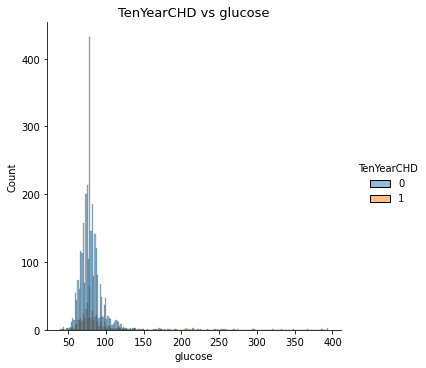

In [ ]:
for a, b in enumerate(numerical_columns ):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=b, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {b}', fontsize=13)
  plt.show()

* **Glucose and totalChol are higly right skewed.**
* **cigsPerDay, sysBP and BMI are moderately right skewed.**
* **Ages, diaBP and heartRate are somewhat normally distributed.**

## **EDA - Feature Analysis on Discrete Features**

<Figure size 720x432 with 0 Axes>

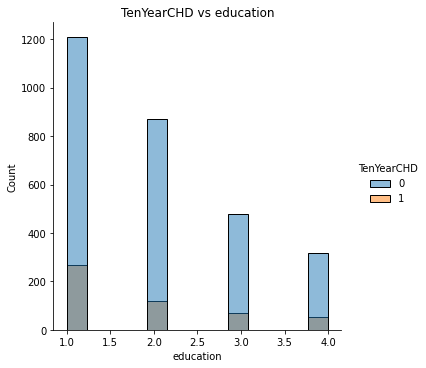

<Figure size 720x432 with 0 Axes>

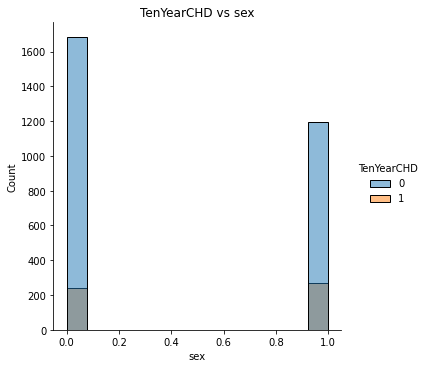

<Figure size 720x432 with 0 Axes>

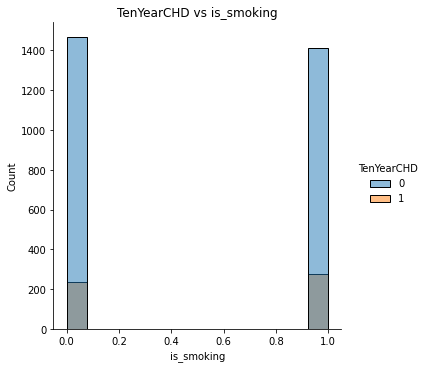

<Figure size 720x432 with 0 Axes>

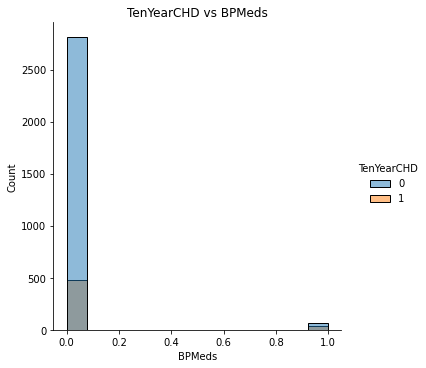

<Figure size 720x432 with 0 Axes>

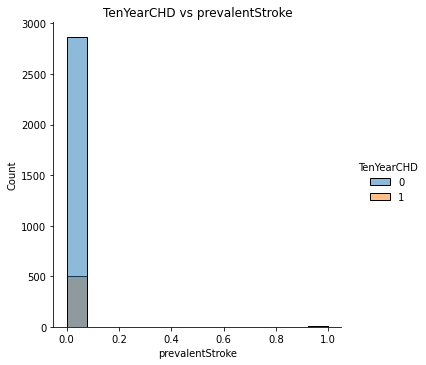

<Figure size 720x432 with 0 Axes>

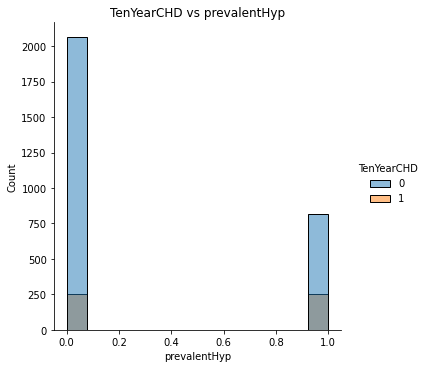

<Figure size 720x432 with 0 Axes>

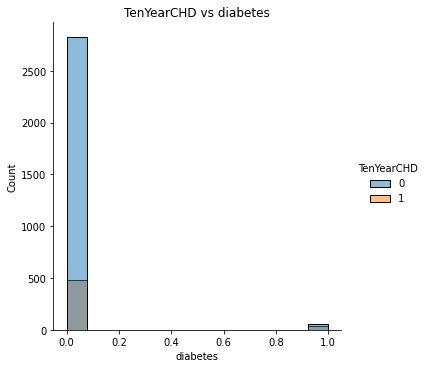

In [ ]:
# Dependent variable vs categorical features
for a, b in enumerate(categorical_columns):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=b, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {b}')
  plt.show()

* **Education is important, as it is evident that if people are aware, they take care and precautions in order to avoid the risk of CHD.**
* **BPMeds, Prevalentstroke, diabetes have very low variance, thus we are unable to come up with any generalized conclusion about the co-relation between their history and prevalence of cardiovascular risk.**

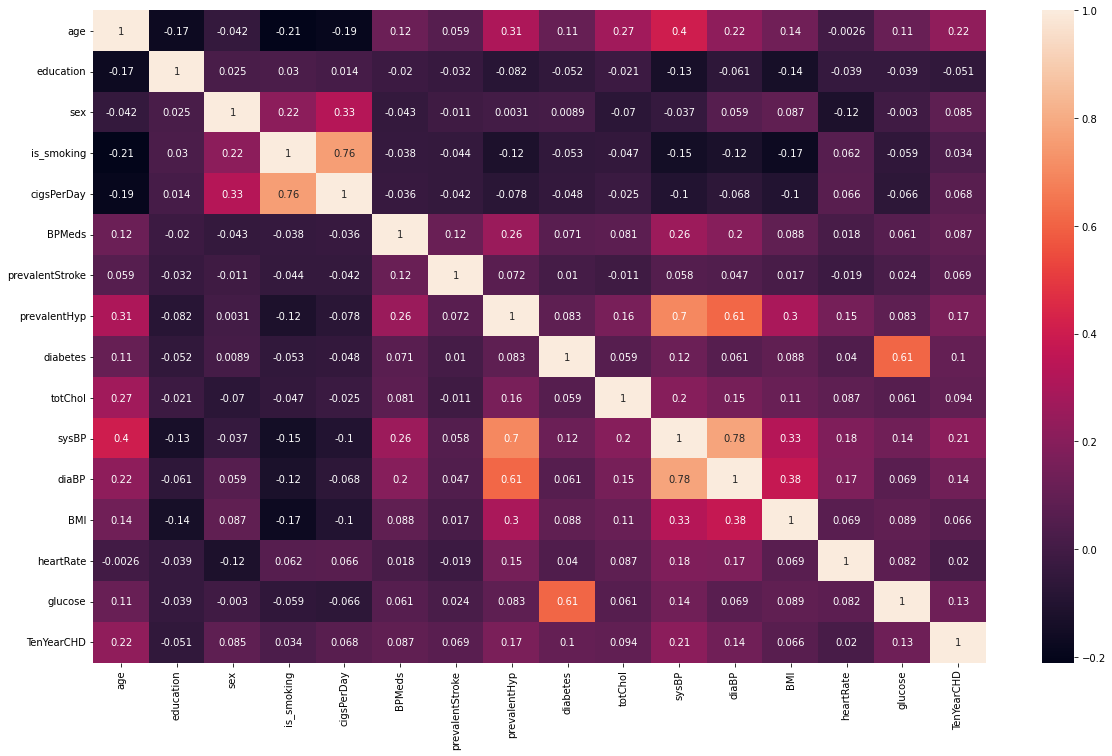

In [ ]:
# lookings at the relationship of features with one another
plt.figure(figsize=(20,12))
sns.heatmap(data = df.corr(),annot= True)

* **sysBP and diaBP show the strongest positive correlation of 0.78 with each other.**
* **is_smoking and cigsPerDay has positive correlation of 0.76.**
* **Correlation of diabetes with glucose and prevalentHype with diaBP is equal i.e. positive correlation of 0.61.**

### **For a healthy human, the BP is 120/80.**
Let us derive a new feature i.e. avgBP which would be defined by the below formula

**avgBP = (sysBP + diaBP)/2**

In [ ]:
df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)

In [ ]:
# Since avgBP has been added, we can now remove sysBP & diaBP
df.drop("sysBP",axis=1,inplace=True)
df.drop("diaBP",axis=1,inplace=True)

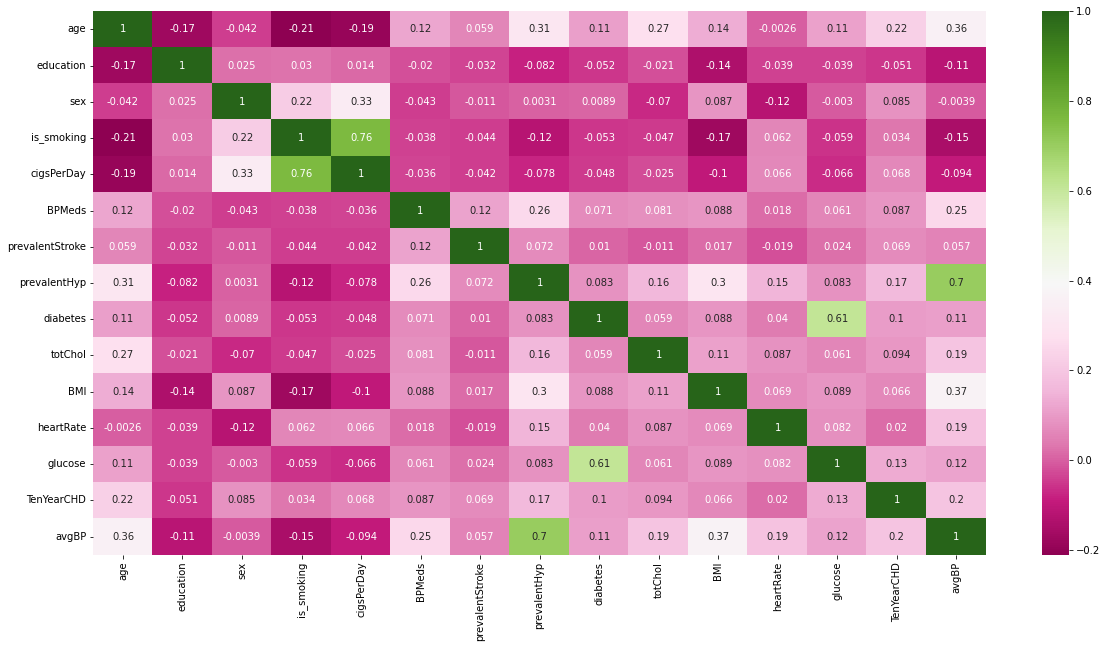

In [ ]:
#Bivariate Analysis: Corelation Matrix
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='PiYG')

## **EDA on Features**

##**Age & Sex v/s Risk**

In [ ]:
df['sex'].unique()

array([0, 1])

Text(0.5, 1.0, 'Male')

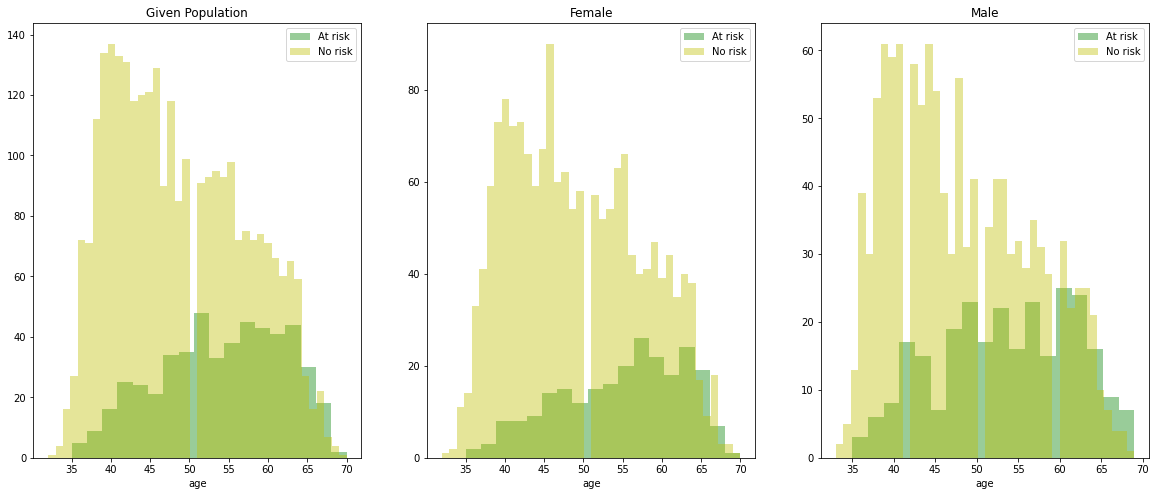

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='g',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='y',kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='g',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='y',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='g',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='y',kde=False)
ax.legend()
ax.set_title("Male")

* **Both women and men lying in Age group of 50 and above have high risk of heart disease.**
* **Men above 45 years are usually at risk, where as women above 55 years are usually at risk.**
* **Men are more likely to have heart disease compared to women.**

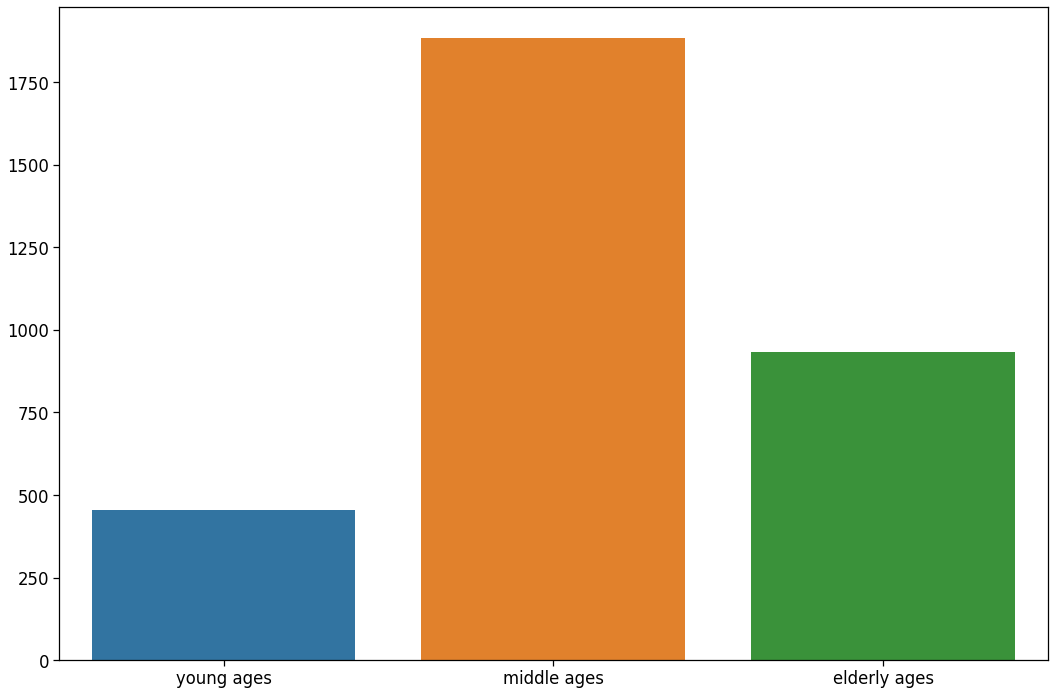

In [ ]:
#dividing the age into three section
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(15,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

* **Number of people belonging to middle age (between 40-55) group are highest in the given dataset followed by elderly age (above 55) group.**
* **Number of people belonging to young age group (between 29-40) are least.**

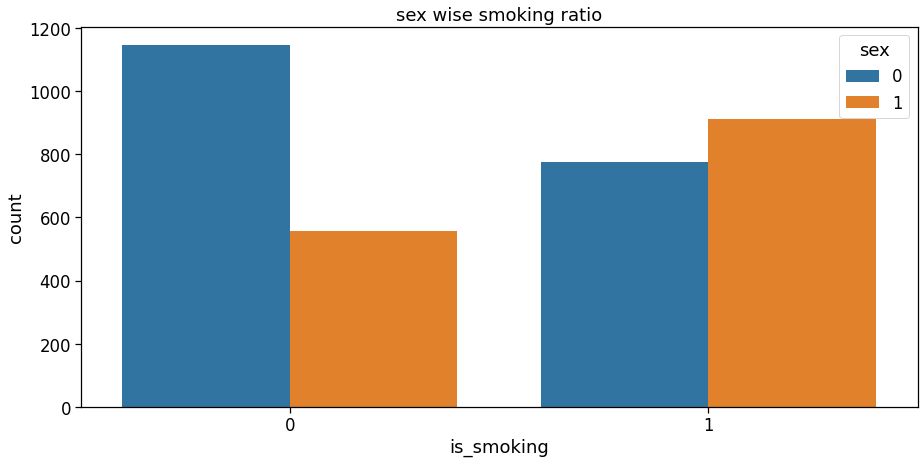

In [ ]:
# number of male and female smokers
plt.figure(figsize=(15,7))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

* **Number of male smokers is higher than female smoker even though the total count of male is less than female..**
* **Number of non-smoking female is higher than number of non-smoking male..**

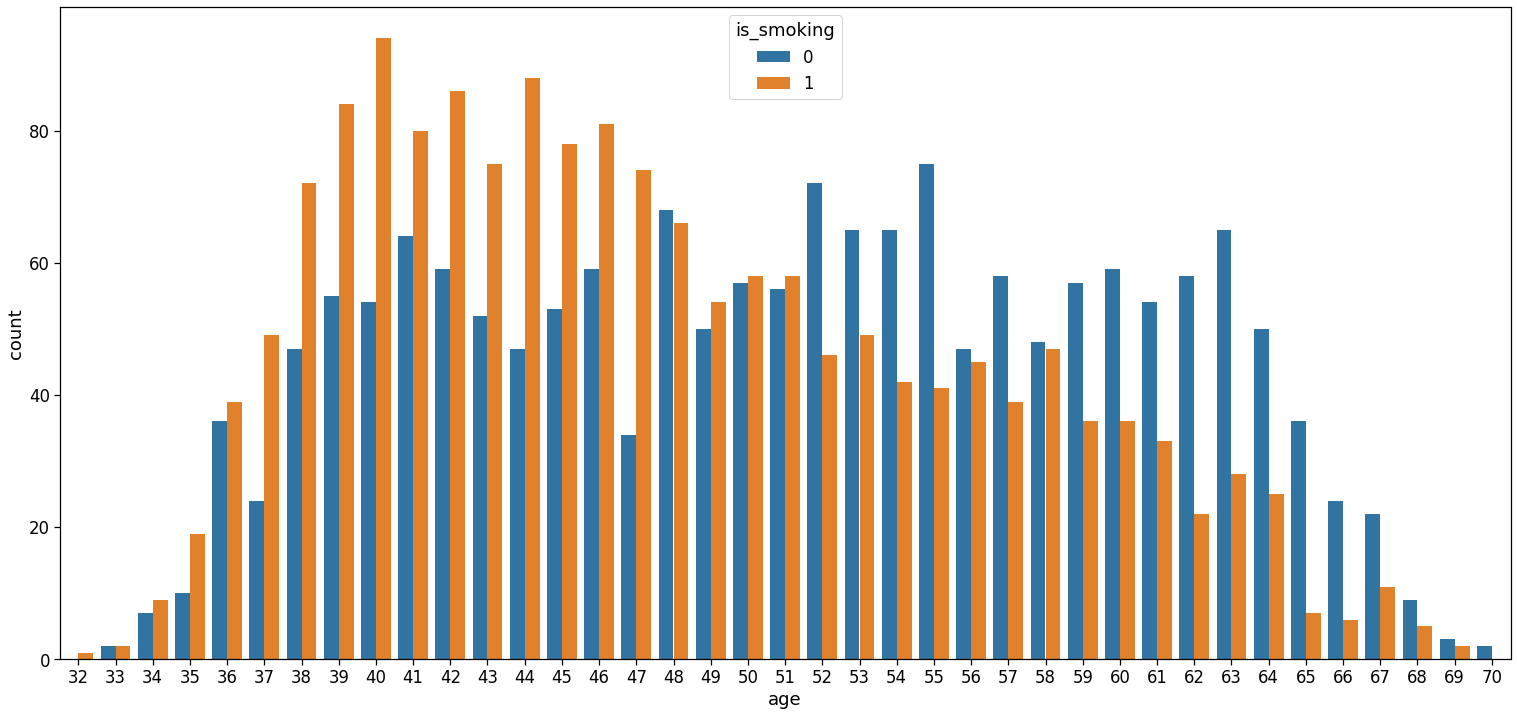

In [ ]:
#age wise smoking ratio
plt.figure(figsize=(26,12), facecolor='w')
sns.countplot(x="age",data=df,hue="is_smoking")

**Number of smokers between the age group of 35 to 50 are highest i.e. Young and middle aged people smokes most.**

### **Age & Smoking v/s Risk**

Text(0.5, 1.0, 'NonSmokers')

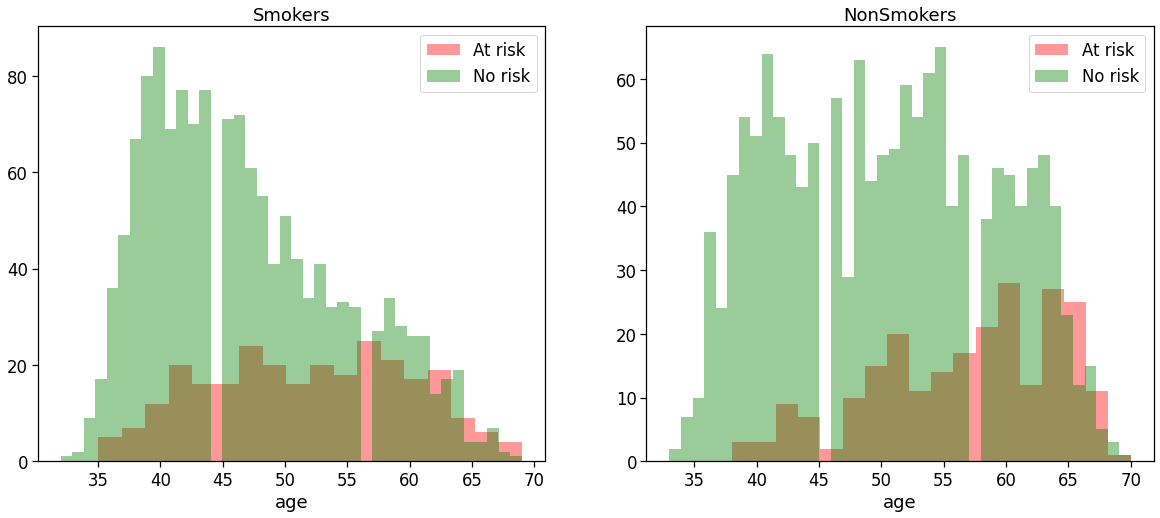

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
smoking= df[df['is_smoking']==1]
non_smoking= df[df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")

**Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.**

### **CigsPerDay & Sex v/s Risk**

In [ ]:
df['is_smoking'].unique()

array([1, 0])

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].astype(int)

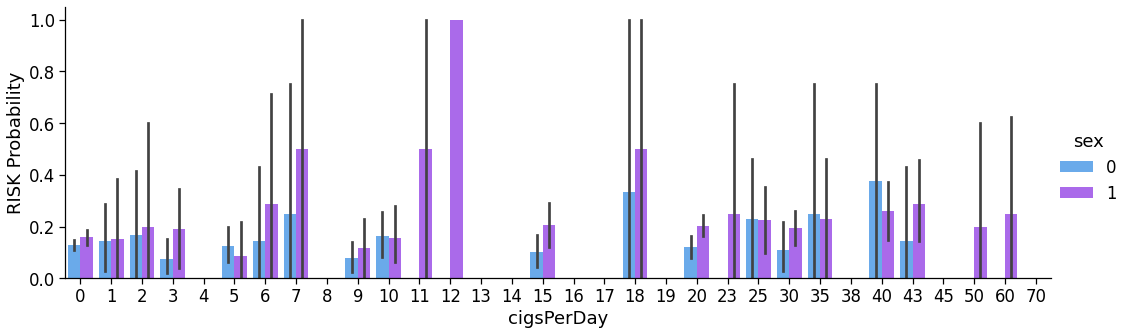

In [ ]:
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3, palette="cool")
g=g.set_ylabels("RISK Probability")

* **It is very difficult to say, if consumption of less or no cigarettes mean lower risk levels.**
* **Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.**

### **Which gender is prone to coronary heart disease?**

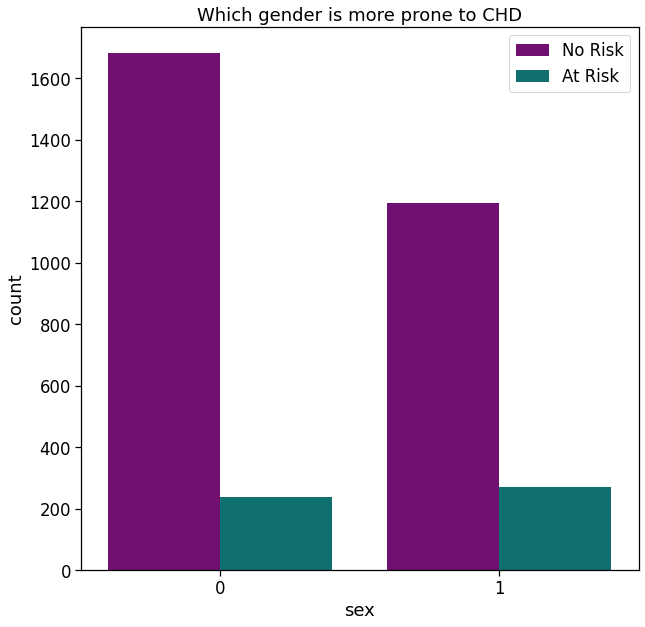

In [ ]:
my_palette = {0 : 'purple' , 1 : 'teal'}

plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

* **The number of males and females which are at risk of CHD is equal.**
* **The number of females who are not at risk is higher than that of male.**

### **Are diabetic patients at more risk of coronary heart disease ??**

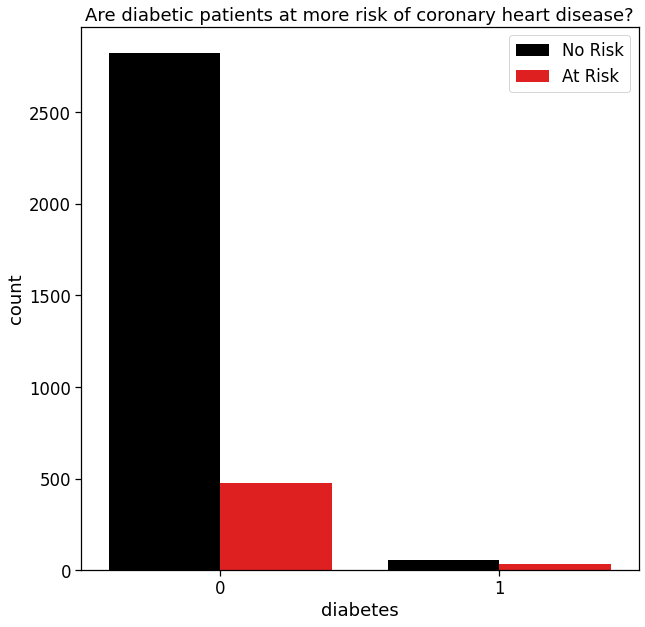

In [ ]:
# diabetes and heart disease relation
my_palette = {0 : 'black' , 1 : 'red'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

* **Diabetic patients are at more risk of CHD**

### **Are hypertensive patients at more risk of coronary heart disease ??**

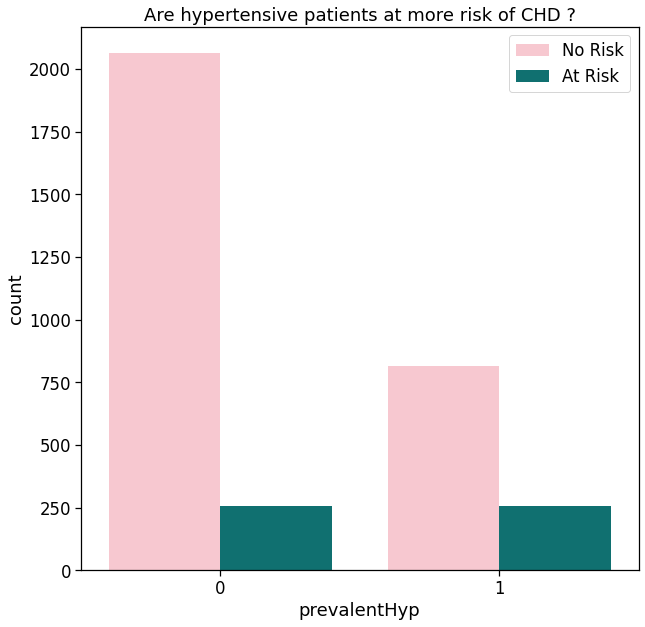

In [ ]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'pink' , 1 : 'teal'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

* **Out of all the people who are not Hypertensive, the number of people getting CHD is very less.**
* **People who are hypertensive has more chances of getting CHD.**

### **Are patients with blood pressure on medication at more risk of coronary heart disease ??**

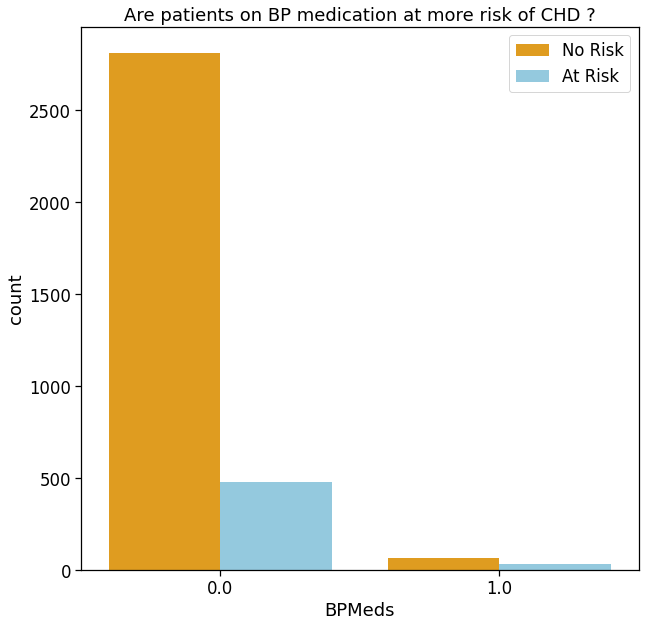

In [ ]:
my_palette = {0 : 'orange' , 1 : 'skyblue'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

* **Patients on BP medication are more prone to CHD where as those who are not on BP medication has severely less chances of getting CHD.**

### **Whether a person who had a stroke earlier more prone to CHD?**

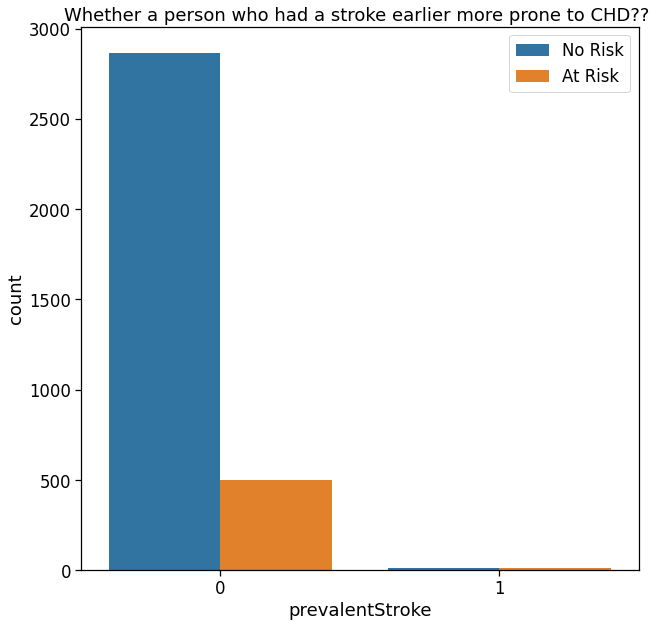

In [ ]:
plt.figure(figsize = (10,10))
# my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

* **The person who previously had a heart stroke are more at risk to CHD than those who did not.**

### **Data Splitting, Training & Modelling**

**Data Splitting**

In [ ]:
# Let us make a copy
new_df = df.copy()

In [ ]:
# Let us now split
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

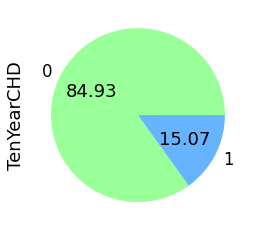

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f',colors = ['#99ff99','#66b3ff'])

As per the above plot our target feature i.e., TenYearCHD, the risk rate is relatively rare, only 15% of the people have this disease.

Hence even if our model gives 94% accuracy! It is misleading.

All those non-risk cases, we’d have 100% accuracy. Those cases in which a person has a risk, we’d have 0% accuracy.

Hence our Evaluation Metrics for class imbalance problems (especiallly health data) would be RECALL, ROC SCORE.

## **Handling Imbalance Data**

In [ ]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape :', len(new_df))
print('Resampled dataset shape :', len(y_smote))

Original dataset shape : 3390
Resampled dataset shape : 5758


In [ ]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [ ]:
y_resampled.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

**Data** is now balanced

## **Standardizing the Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [ ]:
X = pd.DataFrame(X,columns= (new_df.drop(['TenYearCHD'], axis=1).columns))

## **Data Modelling & Training**

We use the following different machine learning models for the dataset:

1. Logistic Regression

2. Decision Tree Classifier

3. K-Nearest Neighbour Classifier

4. Random Forest Classifier

5. Support Vector Machine

6. XGboost Classifier

In [ ]:
# Importing all the essesntial Libraries.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.3,stratify = y_resampled, random_state=0)

## **Logistic Regression**

In [ ]:
# create and train logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 0.64549194, -0.04653606, -0.26512486, -0.34828355,  0.78247204,
         0.0732228 , -0.02240771, -0.33794026, -0.14584898,  0.05003335,
         0.01003646, -0.08396732,  0.32475023,  0.53118409]])

In [ ]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6784119106699752
The accuracy on test data is  0.6585648148148148


[[1333  682]
 [ 614 1401]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

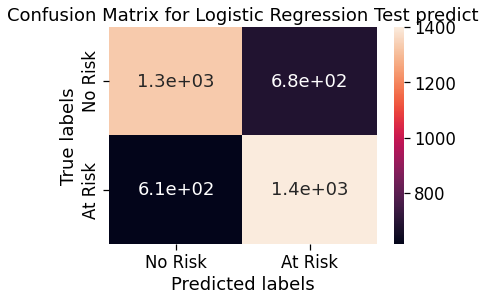

In [ ]:
# Get the confusion matrix for train
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[576 288]
 [302 562]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

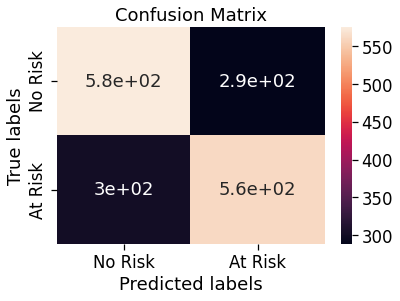

In [ ]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#Performance Metrics
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier
Accuracy : 0.6585648148148148
Precision : 0.6504629629629629
Recall : 0.6611764705882353
F1 Score : 0.6557759626604435


<Figure size 1080x576 with 0 Axes>

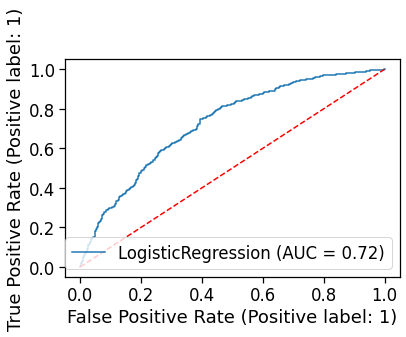

In [ ]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [ ]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [ ]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) 
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) 
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 0.7748842592592593
the training accuracy is 0.8099255583126551


[[1638  377]
 [ 389 1626]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

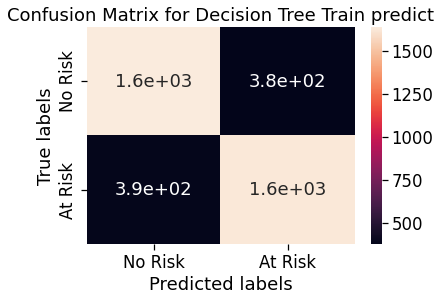

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[673 191]
 [198 666]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

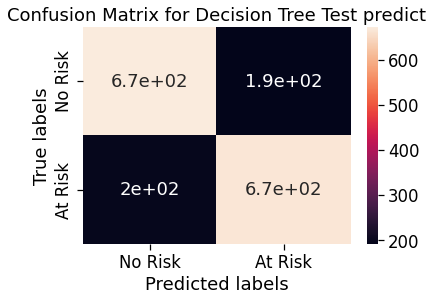

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
decision_tree_model= DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
decision_tree_model = decision_tree_model.predict(X_test)

#Performance Metrics
dt_accuracy= accuracy_score(y_test,test_preds)
dt_precision= precision_score(y_test,test_preds)
dt_recall= recall_score(y_test,test_preds)
dt_f1_score= f1_score( y_test,test_preds)

print('Performance of Decision tree Classifier')
print('Accuracy :' , dt_accuracy)
print('Precision :', dt_precision)
print('Recall :', dt_recall)
print('F1 Score :', dt_f1_score)

Performance of Decision tree Classifier
Accuracy : 0.7748842592592593
Precision : 0.7771295215869312
Recall : 0.7708333333333334
F1 Score : 0.7739686228936665


## **K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of KNN Classifier
Accuracy : 0.7581018518518519
Precision : 0.8657407407407407
Recall : 0.7123809523809523
F1 Score : 0.7816091954022988


<Figure size 1080x576 with 0 Axes>

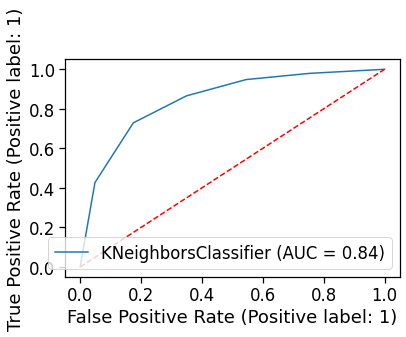

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **Hyper-Parameter tuning for K-Nearest Neighbor**

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score = False,verbose=1)
  

grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [ ]:
# The Best Parameters
print('Best Parameters:', grid_search_knn.best_estimator_.get_params())

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [ ]:
knn_predictions= grid_search_knn.predict(X_test)

#Performance Metrics
knn1_accuracy= accuracy_score(knn_predictions,y_test)
knn1_precision= precision_score(knn_predictions,y_test)
knn1_recall= recall_score(knn_predictions,y_test)
knn1_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN with Hyperparameter Tuning')
print('Accuracy :' , knn1_accuracy)
print('Precision :', knn1_precision)
print('Recall :', knn1_recall)
print('F1 Score :', knn1_f1_score)

Performance of KNN with Hyperparameter Tuning
Accuracy : 0.8188657407407407
Precision : 0.9155092592592593
Recall : 0.7672162948593598
F1 Score : 0.8348284960422164


<Figure size 1080x576 with 0 Axes>

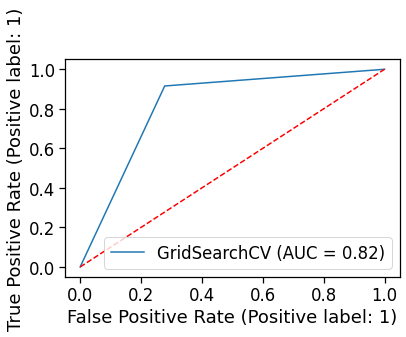

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Inference:**

**before hyperparameter tuning:**

1. AUC = 84%
2. Precision = 85%
3. Recall = 71%
4. F1 Score = 77%

**after hyperparameter tuning:**

1. AUC = 82%
2. Precision = 89%
3. Recall = 77%
4. F1 Score = 83%

**Hence though AUC got reduced,Precision,Recall and F1 Score has incresed**

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [ ]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds)

0.9970223325062034

In [ ]:
accuracy_score(y_test,test_preds)

0.8836805555555556

In [ ]:
roc_auc_score(y_test,test_preds)

0.8836805555555556

In [ ]:
roc_auc_score(y_train,train_preds)

0.9970223325062034

[[2010    5]
 [   7 2008]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

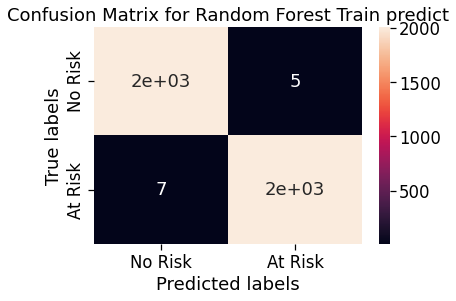

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[768  96]
 [105 759]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

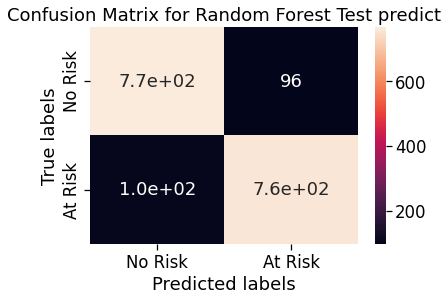

In [ ]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
classifier = classifier.predict(X_test)

#Performance Metrics
rf_accuracy= accuracy_score(y_test,test_preds)
rf_precision= precision_score(y_test,test_preds)
rf_recall= recall_score(y_test,test_preds)
rf_f1_score= f1_score( y_test,test_preds)

print('Performance of Randomforest Classifier')
print('Accuracy :' , rf_accuracy)
print('Precision :', rf_precision)
print('Recall :', rf_recall)
print('F1 Score :', rf_f1_score)

Performance of Randomforest Classifier
Accuracy : 0.8836805555555556
Precision : 0.887719298245614
Recall : 0.8784722222222222
F1 Score : 0.8830715532286213


## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
svm_predictions= svm.predict(X_test)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test)
svm_recall= recall_score(svm_predictions,y_test)
svm_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

Performance of Support Vector Machine Classifier
Accuracy : 0.71875
Precision : 0.7453703703703703
Recall : 0.7076923076923077
F1 Score : 0.7260428410372041


<Figure size 1080x576 with 0 Axes>

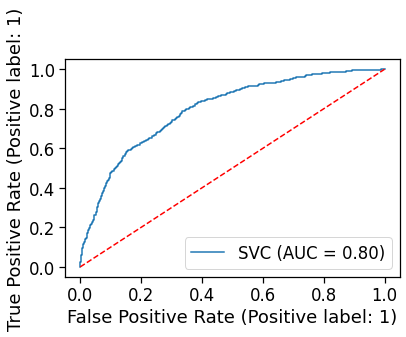

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

## **Hyper-Parameter Tuning for Support Vector Machine**

In [ ]:
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_svm.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.792069 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svm_predictions= grid_search_svm.predict(X_test)

# #Performance Metrics
svm1_accuracy= accuracy_score(svm_predictions,y_test)
svm1_precision= precision_score(svm_predictions,y_test)
svm1_recall= recall_score(svm_predictions,y_test) 
svm1_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier after hyperparameter tuning')
print('Accuracy :' , svm1_accuracy)
print('Precision :', svm1_precision)
print('Recall :', svm1_recall)
print('F1 Score :', svm1_f1_score)

Performance of Support Vector Machine Classifier after hyperparameter tuning
Accuracy : 0.7835648148148148
Precision : 0.8125
Recall : 0.7680525164113785
F1 Score : 0.7896512935883014


<Figure size 1080x576 with 0 Axes>

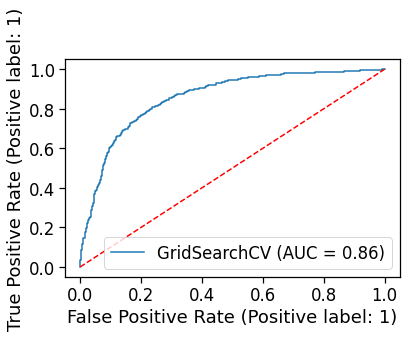

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

### **Inference:**

**We can see a good increase in the performance of Recall, F1_Score, AUC_Score.**

## **XG Boost Classifier**

In [ ]:
import xgboost as xgb
from sklearn import tree
#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [ ]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [ ]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds)

0.8081885856079405

In [ ]:
accuracy_score(y_test,test_preds)

0.9467592592592593

In [ ]:
roc_auc_score(y_test,test_preds)

0.9467592592592593

In [ ]:
roc_auc_score(y_train,train_preds)

0.8081885856079405

[[1701  314]
 [ 459 1556]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

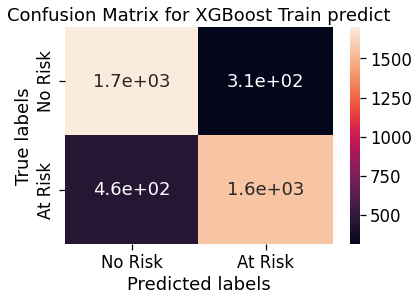

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[836  28]
 [ 64 800]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

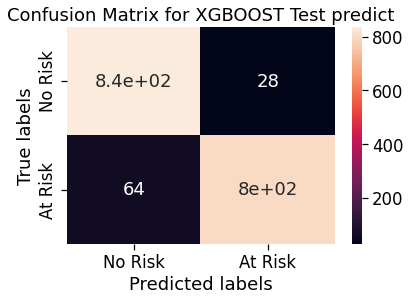

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
xgb_c= xgb.XGBClassifier()
xg_cla.fit(X_train,y_train)
xgb_predictions= knn.predict(X_test)

#Performance Metrics
xgb_accuracy= accuracy_score(y_test,test_preds)
xgb_precision= precision_score(y_test,test_preds)
xgb_recall= recall_score(y_test,test_preds)
xgb_f1_score= f1_score( y_test,test_preds)

print('Performance of XGBoost Classifier')
print('Accuracy :' , xgb_accuracy)
print('Precision :', xgb_precision)
print('Recall :', xgb_recall)
print('F1 Score :', xgb_f1_score)

Performance of XGBoost Classifier
Accuracy : 0.9467592592592593
Precision : 0.966183574879227
Recall : 0.9259259259259259
F1 Score : 0.9456264775413711


## **XGBoost (Feature Importance)**

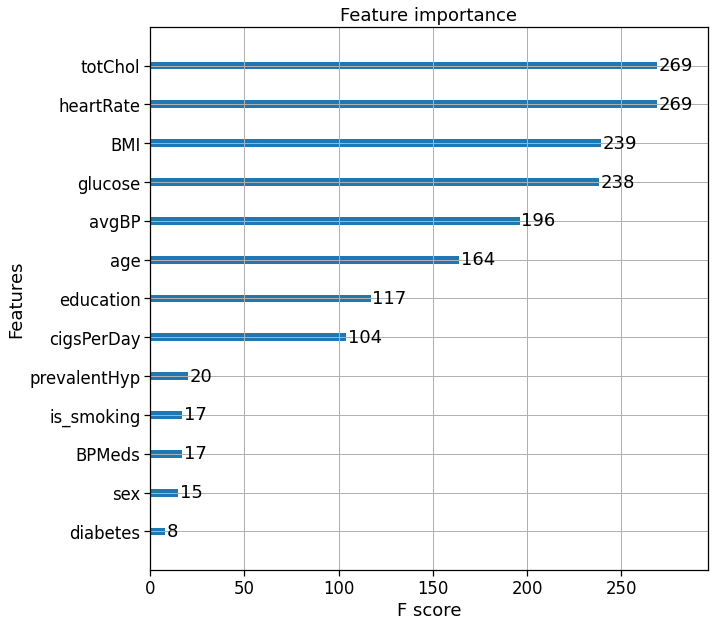

In [ ]:
feature_names = list(df.columns)
feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names = feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()

## **Comparing the performance of all the models**

In [ ]:
# comparing the performances of all the classifiers

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machines','SVM with hyperparameter tuning', 'K Nearest Neighbour', 'KNN with hyperparameter tuning', 'Logistic Regression','Random Forest', 'XGBoost'],
    'Accuracy': [dt_accuracy, svm_accuracy, svm1_accuracy, knn_accuracy, knn1_accuracy, lr_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [dt_precision, svm_precision, svm1_precision, knn_precision, knn1_precision, lr_precision, rf_precision, xgb_precision],
    'Recall': [dt_recall, svm_recall, svm1_recall, knn_recall, knn1_recall, lr_recall, rf_recall, xgb_recall],
    'F1 Score': [dt_f1_score, svm_f1_score, svm1_f1_score, knn_f1_score, knn1_f1_score, lr_f1_score, rf_f1_score, xgb_f1_score]})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
7,XGBoost,0.946759,0.966184,0.925926,0.945626
6,Random Forest,0.883681,0.887719,0.878472,0.883072
4,KNN with hyperparameter tuning,0.818866,0.915509,0.767216,0.834828
2,SVM with hyperparameter tuning,0.783565,0.812500,0.768053,0.789651
0,Decision Tree,0.774884,0.777130,0.770833,0.773969
3,K Nearest Neighbour,0.758102,0.865741,0.712381,0.781609
1,Support Vector Machines,0.718750,0.745370,0.707692,0.726043
5,Logistic Regression,0.658565,0.650463,0.661176,0.655776


## **Conclusion:**
* **Number of people belonging to middle age group are highest whereas number of people belonging to young age group are lowest**
* **Male and female both are equally prone to CHD**
* **Number of male smoker is higher than female smokers.**
* **Age is an important aspect in getting CHD. Middle and older age people are more prone to CHD than young people. Young people are least likely to get CHD.**
* **People who suffered previously from a heart attack have high chances of getting CHD.**
* **People on BP medication or diabetic patients or hypertenisve patients have higher chance of getting a CHD than other people.**
* **XGBoost performed the best among all other models with highest accuracy and f1 score 94%**
* **heartRate is the most important feature in predicting the CHD followed by totChol and glucose.**